**1. Как связаны главные компоненты с исходными данными**

Главные компоненты линейно связаны с исходными данными через матрицу eigenvectors. Они представляют новый базис, который максимально сохраняет дисперсию исходных данных, но в редуцированном пространстве.

**2. Сделайте грубую оценку сжатия данных, если исходная матрица имела размерность (4250, 7), а при восстановлении исполь- зуются три главные компоненты.**

Исходная матрица: 4250 × 7 = 29750 элементов

После PCA с 3 компонентами: 4250 × 3 = 12750 элементов

Коэффициент сжатия: (29750 - 12750) / 29750 ≈ 0.57 или 57%

**3. Сгенерируйте данные в виде эллипса с центром в точке (1.5, -2.5), радиусами (3, 2.5), углом 65 и количеством точек 1100. Оцените собственные вектора, собственные значения, максимальные и минимальные значения в пространстве главных компонент.**

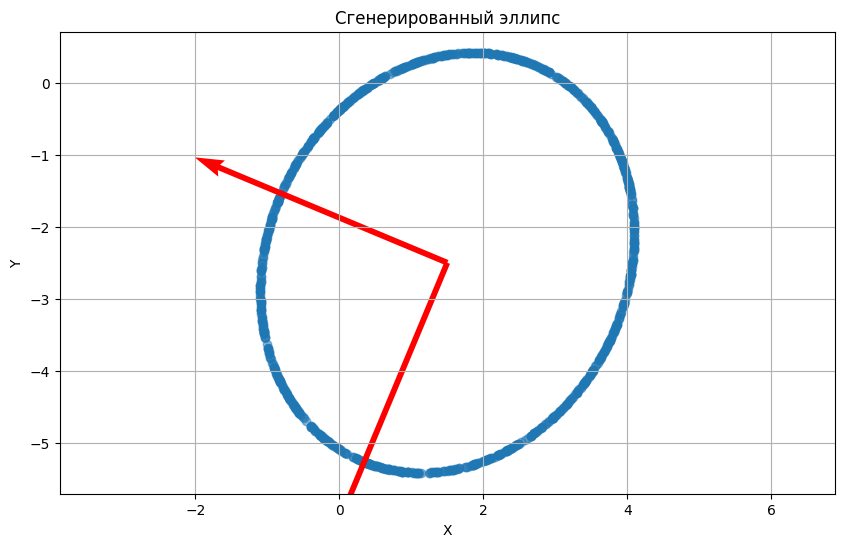

Собственные значения: [3.1162551  4.51751255]
Собственные векторы:
 [[-0.92287185 -0.38510719]
 [ 0.38510719 -0.92287185]]
Максимальное значение: 4.096337883813326
Минимальное значение: -5.416984208658388


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры эллипса
center = [1.5, -2.5]
radii = [3, 2.5]
angle = np.deg2rad(65)
n_points = 1100

# Генерация точек
t = np.random.uniform(0, 2*np.pi, n_points)
x = center[0] + radii[0] * np.cos(t) * np.cos(angle) - radii[1] * np.sin(t) * np.sin(angle)
y = center[1] + radii[0] * np.cos(t) * np.sin(angle) + radii[1] * np.sin(t) * np.cos(angle)

# Анализ главных компонент
X = np.column_stack([x, y])
cov_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Сгенерированный эллипс')
plt.xlabel('X')
plt.ylabel('Y')

# Добавление осей собственных векторов
for i in range(2):
    plt.quiver(center[0], center[1], 
               eigenvectors[0, i] * np.sqrt(eigenvalues[i]), 
               eigenvectors[1, i] * np.sqrt(eigenvalues[i]), 
               color='r', scale=5)

plt.axis('equal')
plt.grid(True)
plt.show()

# Вывод численных характеристик
print("Собственные значения:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)
print("Максимальное значение:", np.max(X))
print("Минимальное значение:", np.min(X))

**4. Для набора данных Cars проанализируйте веса главных компонент при использовании числовых признаков. Какой из параметров вносит наименьший вклад в первую главную компоненту?**

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка локального файла
cars = pd.read_csv('cars.csv')

# Числовые признаки
numeric_features = cars.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Стандартизация и PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cars[numeric_features])
pca = PCA()
pca.fit(X_scaled)

# Веса первой главной компоненты
weights = pd.DataFrame(
    pca.components_[0], 
    index=numeric_features, 
    columns=['PC1 Weight']
)
print(weights)
print("\nНаименьший вклад:", weights.abs().idxmin())

                      PC1 Weight
Year                    0.650361
Distance               -0.452745
Engine_capacity(cm3)    0.188220
Price(euro)             0.580194

Наименьший вклад: PC1 Weight    Engine_capacity(cm3)
dtype: object
